In [21]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import welly
import matplotlib.pyplot as plt

# Load data

In [24]:
# create an empty list to hold the well objects
wells = []

# read LAS files and create Well objects for each file
las_files = ["data/1-BRSA-192-ESS_Default_final.las", "data/3-BRSA-168-ESS_Default_final.las", 
             "data/3-BRSA-240-ESS_Default_final.las", "data/4-BRSA-262-ESS_Default_final.las", "data/4-BRSA-420-ESS_Default_final.las",
            "data/6-BRSA-497-ESS_Default_final.las"]
for las_file in las_files:
    well = welly.Well.from_las(las_file)
    wells.append(well)
    

#create a Project object with the list of Well objects
project = welly.Project(wells)

# Set zone interval to get data from wells
basis_depth = range(2620, 2840)

# Get NPHI, RHOB and Lithology log at desired depth for each well

In [25]:
# Get wells from project
BRSA_192 = project[0]
BRSA_168 = project[1]
BRSA_240 = project[2]
BRSA_262 = project[3]
BRSA_420 = project[4]
BRSA_497 = project[5]

In [26]:
# 1-BRSA-192-ESS_Default_final DataFrame
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_MANUAL_192_PETROBRAS']
BRSA_192_df = BRSA_192.df(keys=desired_curves, basis=basis_depth)

# 1-BRSA-168-ESS_Default_final DataFrame
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_MANUAL_168_PETROBRAS']
BRSA_168_df = BRSA_168.df(keys=desired_curves, basis=basis_depth)

# 1-BRSA-240-ESS_Default_final DataFrame
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_PETROBRAS_240']
BRSA_240_df = BRSA_240.df(keys=desired_curves, basis=basis_depth)

# 1-BRSA-240-ESS_Default_final DataFrame
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_PETROBRAS_240']
BRSA_240_df = BRSA_240.df(keys=desired_curves, basis=basis_depth)

# 1-BRSA-262-ESS_Default_final DataFrame
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_MANUAL_262_PETROBRAS']
BRSA_262_df = BRSA_262.df(keys=desired_curves, basis=basis_depth)

# 1-BRSA-420-ESS_Default_final DataFrame
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_MANUAL_420_PETROBRAS']
BRSA_420_df = BRSA_420.df(keys=desired_curves, basis=basis_depth)

# 1-BRSA-497-ESS_Default_final DataFrame
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_MANUAL_497_PETROBRAS']
BRSA_497_df = BRSA_497.df(keys=desired_curves, basis=basis_depth)



# Correct dataframes lithology codes

In [27]:
# The codes for lithologies was not imported correctly, some codes are being show with decimals values

BRSA_192_df = BRSA_192_df.rename(columns={"LITOLOGIA_MANUAL_192_PETROBRAS": "LITOLOGIA"})
BRSA_168_df = BRSA_168_df.rename(columns={"LITOLOGIA_MANUAL_168_PETROBRAS": "LITOLOGIA"})
BRSA_240_df = BRSA_240_df.rename(columns={"LITOLOGIA_PETROBRAS_240": "LITOLOGIA"})
BRSA_262_df = BRSA_262_df.rename(columns={"LITOLOGIA_MANUAL_262_PETROBRAS": "LITOLOGIA"})
BRSA_420_df = BRSA_420_df.rename(columns={"LITOLOGIA_MANUAL_420_PETROBRAS": "LITOLOGIA"})
BRSA_497_df = BRSA_497_df.rename(columns={"LITOLOGIA_MANUAL_497_PETROBRAS": "LITOLOGIA"})

# 1 - Create well dfs list

well_dfs_list = [BRSA_192_df, BRSA_168_df, BRSA_240_df, BRSA_262_df, BRSA_420_df, BRSA_497_df]

# Round up lithology codes
for i in range(len(well_dfs_list)):
    well_df = well_dfs_list[i]
    well_df.LITOLOGIA = well_df.LITOLOGIA.round()
    










# Make target lithology variables be binary, 1 for shale and 0 for sandstone

In [28]:
# Replace lithology codes with it's respectives names
# Consider code 52 "Folhelho Siltico" as just "Shale"
# Consider code 50 as code 49 "Sandstone"

for i in range(len(well_dfs_list)):
    well_df = well_dfs_list[i]
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 57.000, 'LITOLOGIA'] = "Shale"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 52.000, 'LITOLOGIA'] = "Shale"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 49.000, 'LITOLOGIA'] = "Sandstone"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 50.000, 'LITOLOGIA'] = "Sandstone"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 1.000, 'LITOLOGIA'] = "Limestone"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 54.000, 'LITOLOGIA'] = "Siltstone"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 58.000, 'LITOLOGIA'] = "Marl"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 56.000, 'LITOLOGIA'] = "Argillite"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 5.000, 'LITOLOGIA'] = "Dolomitic Marble"
    well_dfs_list[i].loc[well_dfs_list[i]['LITOLOGIA'] == 53.000, 'LITOLOGIA'] = "LIMOARCILITA"





    
    

# Concat data

In [29]:
# Concatenate well dfs
processed_well_dfs = pd.concat([well_dfs_list[0], well_dfs_list[1], well_dfs_list[2]], axis=0)
processed_well_dfs.dropna(inplace=True)

processed_well_dfs['LITOLOGIA'].unique()



array(['Shale', 'Sandstone', 'Siltstone', 'Marl', 'Limestone',
       'Argillite', 'Dolomitic Marble', 'LIMOARCILITA'], dtype=object)

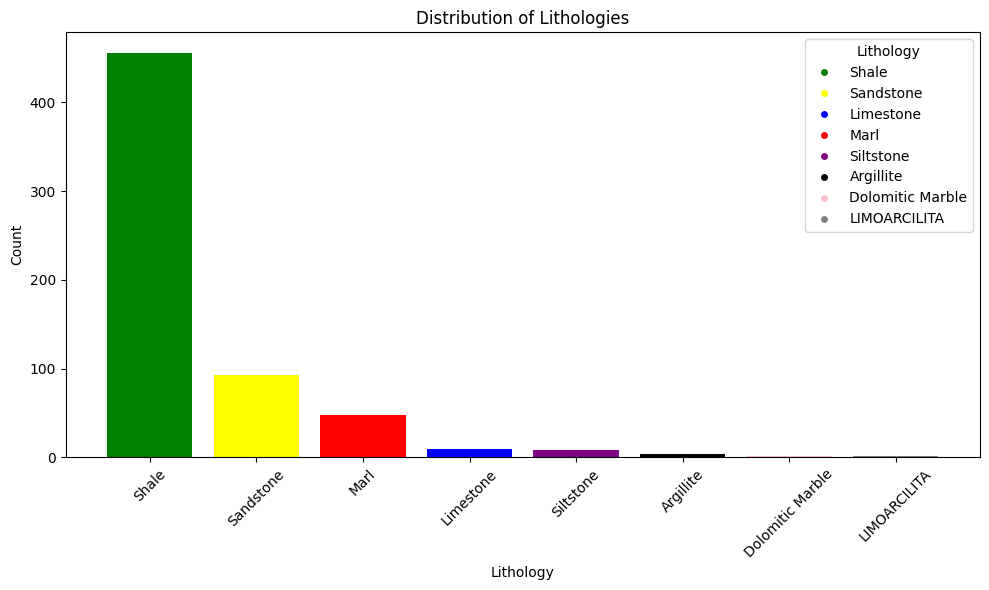

In [30]:
# Count lithologies occurences and plot it
lithology_counts  = processed_well_dfs['LITOLOGIA'].value_counts()

# Build plot
color_dict = {
    'Shale': 'green',
    'Sandstone': 'yellow',
    'Limestone': 'blue',
    'Marl': 'red',
    'Siltstone': 'purple',
    'Argillite': 'black',
    'Dolomitic Marble': 'pink',
    'LIMOARCILITA': 'gray',
    # Add more lithologies and colors as needed
}

plt.figure(figsize=(10, 6))  # Set the figure size

# Iterate throught the unique lithologies and plot bars with colors
for lithology, count in lithology_counts.items():
    plt.bar(lithology, count, color=color_dict.get(lithology, 'gray'))
    
# Set labels and titles
plt.xlabel('Lithology')
plt.ylabel('Count')
plt.title('Distribution of Lithologies')

# Create a legend for colors using custom patches
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=lithology) for lithology, color in color_dict.items()]
plt.legend(handles=legend_patches, title='Lithology', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Drop low occurences lithologies

In [31]:

processed_well_dfs = processed_well_dfs[~processed_well_dfs['LITOLOGIA'].isin(['Limestone', 'Siltstone', 'Argillite', 'Dolomitic Marble', 'LIMOARCILITA'])]

processed_well_dfs['LITOLOGIA'].unique()

array(['Shale', 'Sandstone', 'Marl'], dtype=object)

In [32]:
from sklearn import preprocessing
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = processed_well_dfs[["NPHI", "RHOB"]]
X = min_max_scaler.fit_transform(X)
Y = processed_well_dfs["LITOLOGIA"]
Y = np.array(Y)


# Generate test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33)


# Define and train model

In [33]:
# Define and train model
RFMC = RandomForestClassifier()

RFMC.fit(X_train,Y_train)
print('score: ', RFMC.score(X_test,Y_test))
# using three wells: score:  0.8920454545454546

score:  0.8434343434343434


In [34]:
# Predict shale/sandstone lithology for well 6-BRSA-639-ESS_Default_final
#from sklearn.metrics import zero_one_score
las_files = "data/6-BRSA-639-ESS_Default_final.las"
well = welly.Well.from_las(las_files)
desired_curves = ['NPHI', 'RHOB', 'LITOLOGIA_MANUAL_639_PETROBRAS']
BRSA_639_df = well.df(keys=desired_curves, basis=basis_depth)
BRSA_639_df.LITOLOGIA_MANUAL_639_PETROBRAS = BRSA_639_df.LITOLOGIA_MANUAL_639_PETROBRAS.round()
BRSA_639_df
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 57.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Shale"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 52.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Shale"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 49.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Sandstone"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 50.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Sandstone"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 1.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Limestone"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 54.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Siltstone"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 58.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Marl"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 56.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Argillite"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 5.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "Dolomitic Marble"
BRSA_639_df.loc[BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'] == 53.000, 'LITOLOGIA_MANUAL_639_PETROBRAS'] = "LIMOARCILITA"
BRSA_639_df = BRSA_639_df[~BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'].isin(['Limestone', 'Siltstone', 'Argillite', 'Dolomitic Marble', 'LIMOARCILITA', 35.0])]
BRSA_639_df['LITOLOGIA_MANUAL_639_PETROBRAS'].unique()



array(['Shale', 'Marl', 'Sandstone'], dtype=object)

In [36]:
X_predict = BRSA_639_df[["NPHI", "RHOB"]]
X_predict = min_max_scaler.fit_transform(X_predict)
Y_real = BRSA_639_df["LITOLOGIA_MANUAL_639_PETROBRAS"]
Y_real = np.array(Y_real)
LITHO_PREDICTED = RFMC.predict(X_predict)



In [37]:
print(classification_report(LITHO_PREDICTED, Y_real))

              precision    recall  f1-score   support

        Marl       0.00      0.00      0.00         0
   Sandstone       0.50      0.93      0.65        14
       Shale       0.99      0.76      0.86       192

    accuracy                           0.77       206
   macro avg       0.50      0.56      0.50       206
weighted avg       0.96      0.77      0.84       206



C:\Users\jvito\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jvito\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jvito\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
